# Remote data access using pandas

### Imports & Settings

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
from datetime import datetime
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
#import mplfinance as mpf
import seaborn as sns

## Descargar las empresas que forman el SP500 de la wikipedia

In [3]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_constituents = pd.read_html(sp_url, header=0)[0]

In [4]:
sp500_constituents

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


### Descargar las empresas del IBEX35

In [5]:
#Ejemplo del Ibex 35 de la página de Sabadell
ibex_url = 'https://www.bsmarkets.com/cs/Satellite?cid=1191407146076&pagename=BSMarkets2%2FPage%2FPage_Interna_WFG_Template&language=es_ES'
#tiene varias tablas debemos especificar la que queremos llevar al DF
ibex35_constituents = pd.read_html(ibex_url)

In [6]:
ibex35_constituents

[  Mayores subidas: Mayores subidas:.1
 0              GRF            +3,32 %
 1              ITX            +1,48 %
 2              IDR            +1,43 %,
   Mayores bajadas: Mayores bajadas:.1
 0              RED            -1,09 %
 1             NTGY            -0,81 %
 2              TEF            -0,70 %,
                            TÃ­tulo   TKR  IntradÃ­a   Precio  Var. (%)  \
 0                          ACCIONA   ANA        NaN  1326000        26   
 1                  ACCIONA ENERGIA   ANE        NaN   278800         7   
 2                      ACERINOX SA   ACX        NaN   106100        86   
 3                              ACS   ACS        NaN   392600       -10   
 4                             AENA  AENA        NaN  1638500        37   
 5                          AMADEUS   AMS        NaN   657600        61   
 6                    ARCELORMITTAL   MTS        NaN   261400       -57   
 7          BANCO DE BILBAO VIZCAYA  BBVA        NaN    82540         5   
 8         

In [7]:
#Los valores estan en el tabla 2
ibex35_constituents = pd.read_html(ibex_url, header=0)[2]
ibex35_constituents

,TÃ­tulo,TKR,IntradÃ­a,Precio,Var. (%),Var. (â¬),MÃ¡x.,MÃ­n.,Volumen,Hora
0,ACCIONA,ANA,NaN,1326000,26,3500,1342000,1322000,28.843,17:02
1,ACCIONA ENERGIA,ANE,NaN,278800,7,200,281800,275200,160.662,17:11
2,ACERINOX SA,ACX,NaN,106100,86,900,106250,104850,486.546,17:09
3,ACS,ACS,NaN,392800,-5,-200,395100,392200,103.314,17:10
4,AENA,AENA,NaN,1638500,37,6000,1643500,1623000,26.706,17:09
5,AMADEUS,AMS,NaN,657600,61,4000,659200,650600,193.213,17:10
6,ARCELORMITTAL,MTS,NaN,261300,-61,-1600,263300,259450,210.595,17:10
7,BANCO DE BILBAO VIZCAYA,BBVA,NaN,82540,5,40,82880,81700,3.617.633,17:10
8,BANCO DE SABADELL,SAB,NaN,11195,-31,-35,11240,11110,16.851.148,17:10
9,BANCO SANTANDER,SAN,NaN,37905,7,25,37995,37605,11.557.783,17:10


### Symbol de Zimmer Biomet

In [22]:
sp500_constituents.columns

Index(['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry',
       'Headquarters Location', 'Date added', 'CIK', 'Founded'],
      dtype='object')

In [9]:
symbol_sol = sp500_constituents[sp500_constituents["Security"] == "Zimmer Biomet"]
symbol_sol

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


### 5 empresas mas antiguas del SP500

In [31]:
sp500_constituents.sort_values(by=['Date added'], inplace=True, ascending=True)

In [33]:
sp500_constituents.head(5)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
380,PG,Procter & Gamble,Consumer Staples,Personal Care Products,"Cincinnati, Ohio",1957-03-04,80424,1837
84,CPB,Campbell Soup Company,Consumer Staples,Packaged Foods & Meats,"Camden, New Jersey",1957-03-04,16732,1869
74,BMY,Bristol Myers Squibb,Health Care,Pharmaceuticals,"New York City, New York",1957-03-04,14272,1989 (1887)
118,KO,Coca-Cola Company (The),Consumer Staples,Soft Drinks & Non-alcoholic Beverages,"Atlanta, Georgia",1957-03-04,21344,1886


## Pandas-datareader for Market Data. FRED

Podemos acceder a las siguientes fuentes de datos:
    -Tiingo
    -IEX
    -Alpha Vantage
    -Econdb
    -Enigma
    -Quandl
    -St.Louis FED (FRED)
    -Kenneth Frenchs data library
    -World Bank
    -OECD
    -Eurostat
    -Thrift Savings Plan
    -Nasdaq Trader symbol definitions
    -Stooq
    -MOEX
    -Naver Finance
    -Yahoo Finance

### Descargar los valores de PIB de USA del año 2022

In [3]:
import pandas_datareader.data as web    # pandas 0.19.x and later
import datetime
# seleccionames fechas y GDP como variable
start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2022, 12, 31)
gdp = web.DataReader("GDP", "fred", start, end)

In [9]:
gdp

,GDP
DATE,
2022-01-01,25029.116
2022-04-01,25544.273
2022-07-01,25994.639
2022-10-01,26408.405


### Descarga el Índice del precio al consumo de consumidores urbanos y el de todos los productos menos comida y energía en ciudades de USA del año 2022 

In [6]:
# url de FRED: https://fred.stlouisfed.org/series/CPILFESL
# Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average (CPILFESL)
start = datetime.datetime(2022, 1, 1)
end = datetime.datetime(2022, 12, 31)
CPILFESL = web.DataReader("CPILFESL", "fred", start, end)
#Los ultimos 3 registros, último trimestre
CPILFESL.tail(3)

,CPILFESL
DATE,
2022-10-01,299.333
2022-11-01,300.261
2022-12-01,301.460


## Yahoo Finance

### Último año de datos diarios de Microsoft

In [12]:
import yfinance as yf

symbol = 'MSFT'
ticker = yf.Ticker(symbol)
df_msft = ticker.history(period = '365d',
                    interval = '1d',
                    actions=True,
                    auto_adjust=True)

In [13]:
df_msft

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-07-11 00:00:00-04:00,262.019087,262.887064,258.596513,260.894684,19455200,0.0,0.0
2022-07-12 00:00:00-04:00,262.245955,262.305133,248.595109,250.202835,35868500,0.0,0.0
2022-07-13 00:00:00-04:00,246.770359,250.084435,244.718787,249.265778,29497400,0.0,0.0
2022-07-14 00:00:00-04:00,247.145174,251.652702,242.578453,250.607193,25102800,0.0,0.0
2022-07-15 00:00:00-04:00,252.224774,256.811210,251.287761,253.211105,29774100,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-13 00:00:00-05:00,376.019989,377.640015,370.769989,374.369995,30955500,0.0,0.0
2023-12-14 00:00:00-05:00,373.309998,373.760010,364.130005,365.929993,43277500,0.0,0.0
2023-12-15 00:00:00-05:00,366.850006,372.399994,366.279999,370.730011,78478200,0.0,0.0


### Gráfico de MSFT último año

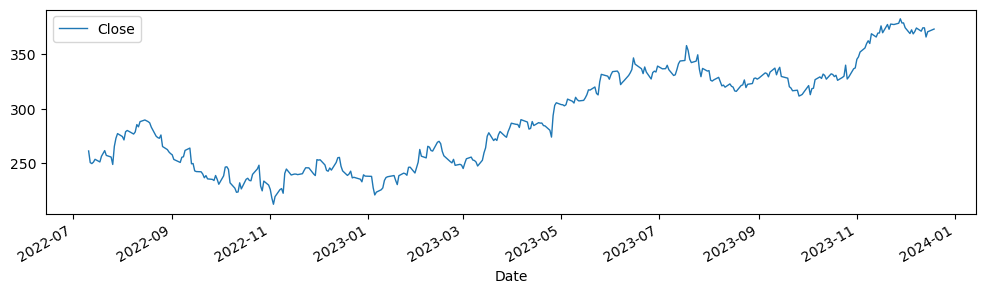

In [14]:
# Con Pandas podemos pintar directamente
# eje y = valores de Close
# eje x = valores del index (fecha)
# atributo lw es el grosor de la linea
df_msft.plot.line(y='Close',figsize=(12,3),lw=1);

df_msft.plot.line(y='Close', f)


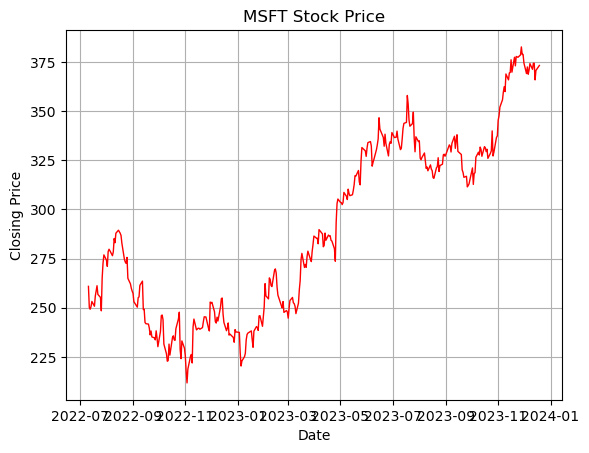

In [25]:
import matplotlib.pyplot as plt

# Extract the date and close price columns
closing_price = df_msft['Close']

plt.plot(closing_price, color='red', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('MSFT Stock Price')

# Add the grid
plt.grid(True)

# Show the plot
plt.show()

### Datos Mensuales de Google 2018-2021

In [28]:
# especificar fechas, periodo de 1mo y symbol
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2021, 12, 31)
symbol = 'GOOG'
ticker = yf.Ticker(symbol)
df_goog = ticker.history(start=start,
                         end=end,
                    interval = '1mo',
                    actions=True,
                    auto_adjust=True)

In [30]:
df_goog.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-01 00:00:00-05:00,52.417000,59.344501,52.261501,58.497002,574768000,0.0,0.0
2018-02-01 00:00:00-05:00,58.130501,58.700001,49.627998,55.236500,847640000,0.0,0.0
2018-03-01 00:00:00-05:00,55.393501,58.852501,49.032001,51.589500,907066000,0.0,0.0
2018-04-01 00:00:00-04:00,51.140999,54.708248,49.518501,50.866501,834318000,0.0,0.0
2018-05-01 00:00:00-04:00,50.682999,55.537498,50.314499,54.249500,636988000,0.0,0.0


## Nasdaq Symbols

In pandas_datareader/nasdaq_trader.py, change

    with warnings.catch_warnings(record=True):
        data = read_csv(
            StringIO("\n".join(lines[:-1])),
            "|",
            dtype=_TICKER_DTYPE,
            converters=converter_map,
            index_col=1,
        )
to

    with warnings.catch_warnings(record=True):
        data = read_csv(
            StringIO("\n".join(lines[:-1])),
            sep="|",
            dtype=_TICKER_DTYPE,
            converters=converter_map,
            index_col=1,
        )

In [1]:
# Pandas Data reader tiene una funcionalidad específica
# Importamos
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
symbols = get_nasdaq_symbols()
symbols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11172 entries, A to ZYXI
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Nasdaq Traded     11172 non-null  bool    
 1   Security Name     11172 non-null  object  
 2   Listing Exchange  11172 non-null  category
 3   Market Category   11172 non-null  object  
 4   ETF               11172 non-null  bool    
 5   Round Lot Size    11172 non-null  float64 
 6   Test Issue        11172 non-null  bool    
 7   Financial Status  5021 non-null   category
 8   CQS Symbol        6151 non-null   object  
 9   NASDAQ Symbol     11171 non-null  object  
 10  NextShares        11172 non-null  bool    
dtypes: bool(4), category(2), float64(1), object(4)
memory usage: 589.6+ KB


In [3]:
# filtro solo los ETF
symbols[symbols.ETF == True]

,Nasdaq Traded,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
Symbol,,,,,,,,,,,
AAA,True,Investment Managers Series Trust II AXS First ...,P,,True,100.0,False,NaN,AAA,AAA,False
AAAU,True,Goldman Sachs Physical Gold ETF Shares,Z,,True,100.0,False,NaN,AAAU,AAAU,False
AADR,True,AdvisorShares Dorsey Wright ADR ETF,Q,G,True,100.0,False,N,NaN,AADR,False
AAPB,True,GraniteShares 1.75x Long AAPL Daily ETF,Q,G,True,100.0,False,N,NaN,AAPB,False
AAPD,True,Direxion Daily AAPL Bear 1X Shares,Q,G,True,100.0,False,N,NaN,AAPD,False
...,...,...,...,...,...,...,...,...,...,...,...
ZROZ,True,PIMCO 25 Year Zero Coupon U.S. Treasury Index...,P,,True,100.0,False,NaN,ZROZ,ZROZ,False
ZSB,True,USCF ETF Trust USCF Sustainable Battery Metals...,P,,True,100.0,False,NaN,ZSB,ZSB,False
ZSC,True,USCF ETF Trust USCF Sustainable Commodity Stra...,P,,True,100.0,False,NaN,ZSC,ZSC,False
